In [1]:
import torch
import matplotlib.pyplot as plt

# Heterogenous Data

Text(0.5, 1.0, 'Heterogenous Data on Random Graph')

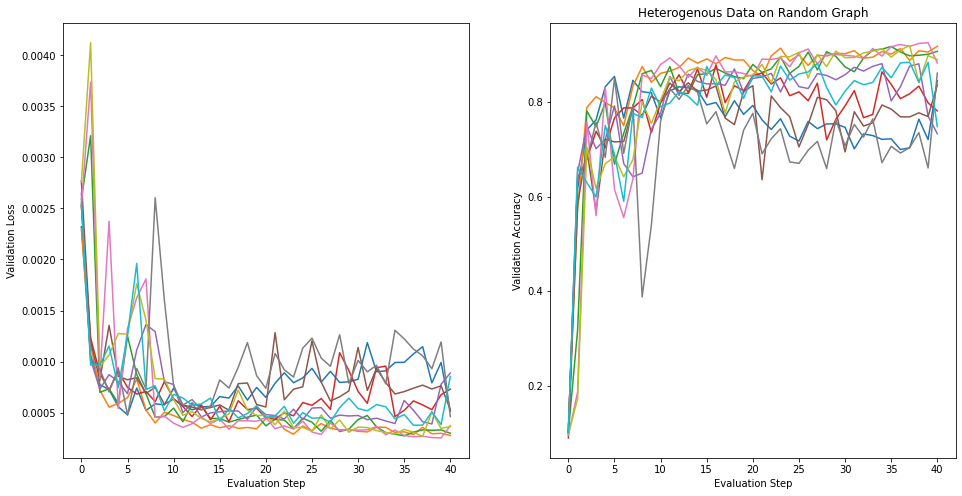

In [6]:
data_dict = torch.load("outputs/1600_e40_5.pt")
obvs = data_dict["obj_vals"]
accs = data_dict["accuracy"]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax0.plot(obvs)
ax0.set_xlabel("Evaluation Step")
ax0.set_ylabel("Validation Loss")
ax1.plot(accs)
ax1.set_xlabel("Evaluation Step")
ax1.set_ylabel("Validation Accuracy")

# Uniform Randomly Split Data

# Observations

- Images processed per node: BatchSize x InnerIterations x OuterIterations = 64 x 5 x 1600 = 512000
- 